In [1]:
#Figure out what statistical analysis to perform
#correlations
#ask about this at mentor call
#correlation between month and time of year being mentioned in a tag?
#code tags and styles into vectors?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from astropy.io import fits
from astropy.table import Table
from scipy.stats.stats import pearsonr
from scipy import stats
from collections import Counter


In [3]:
#import data
df = pd.read_csv('../data/data_clean.csv')

In [4]:
df.head()

,Unnamed: 0,names,pictures,loc,time,style_0,style_1,style_2,tags_0,tags_1,tags_2,tags_3,tags_4,tags_5,tags_6,tags_7,tags_8,tags_9
0,0,000ecstaSY000,75820.jpg,"Surat, Gujarat",2011-07-09,romantic,fall,NaN,puple,boots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,000ecstaSY000,75818.jpg,"Surat, Gujarat",2012-08-04,chic,beach,summer,maroon,bracelet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0011zm,129462.jpg,"Ontario, Ontario",2013-04-15,urban,spring,NaN,boots,jacket,leggings,shirt,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0011zm,129468.jpg,"Ontario, Ontario",2010-04-22,vintage,spring,NaN,hat,bag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0011zm,129454.jpg,"Ontario, Ontario",2014-07-30,leather,other,summer,shirt,bra,pants,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
tagCounts = [df['tags_0'].count(), df['tags_1'].count(), df['tags_2'].count(), df['tags_3'].count(), df['tags_4'].count(), df['tags_5'].count(), 
             df['tags_6'].count(), df['tags_7'].count(), df['tags_8'].count(), df['tags_9'].count()]
tagCounts

[275490, 253752, 217159, 192118, 163281, 147413, 113407, 99469, 64728, 36652]

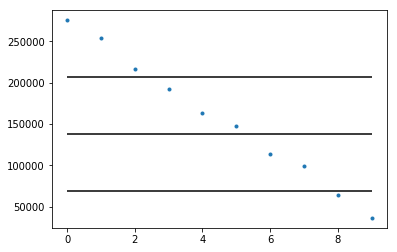

In [6]:
plt.plot(tagCounts, linestyle='', marker='.')
plt.hlines(tagCounts[0]/2, xmin = 0, xmax = 9)
plt.hlines(tagCounts[0]/4, xmin = 0, xmax = 9)
plt.hlines(3*tagCounts[0]/4, xmin = 0, xmax = 9)

plt.show()

In [7]:
#split dataframe into styles and tasgs
tags = pd.read_csv('../data/data_clean.csv', usecols = ['tags_0', 'tags_1','tags_2'], iterator=True, chunksize=1000)
tags = pd.concat(tags)
tags.head()

,tags_0,tags_1,tags_2
0,puple,boots,NaN
1,maroon,bracelet,NaN
2,boots,jacket,leggings
3,hat,bag,NaN
4,shirt,bra,pants


In [8]:
tags.head()

,tags_0,tags_1,tags_2
0,puple,boots,NaN
1,maroon,bracelet,NaN
2,boots,jacket,leggings
3,hat,bag,NaN
4,shirt,bra,pants


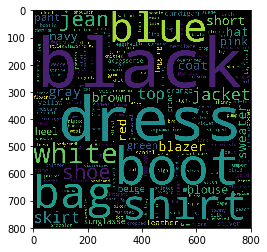

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

tagWords = ' '
for index, row in df.iterrows():
    word0 = row['tags_0']
    if (word0 != None) & ('nan' not in str(word0)):
        tagWords = tagWords + str(word0) + ' '
    word1 = row['tags_1']
    if (word1 != None) & ('nan' not in str(word1)):
        tagWords = tagWords + str(word1) + ' '
    word2 = row['tags_2']
    if (word2 != None) & ('nan' not in str(word2)):
        tagWords = tagWords + str(word2) + ' '

wordcloudTags = WordCloud(width = 800, height = 800, 
                background_color ='black', collocations = False).generate(tagWords)

plt.imshow(wordcloudTags)
plt.show()

In [10]:
count = 0
indexs = []
for index, row in df.iterrows():
    word0 = row['tags_0']
    if 'nan' in str(word0):
        count += 1
        indexs.append(index)
        
print(count)


8732


{'shirt': 20044, 'blazer': 12763, 'coat': 12126, 'shorts': 12638, 'skirt': 17103, 'boots': 40535, 'sweater': 12736, 'gray': 13720, 'hat': 11589, 'top': 17869, 'red': 12131, 'dress': 58451, 'black': 72571, 'brown': 12535, 'blue': 24293, 'jeans': 22394, 'bag': 27941, 'jacket': 19946, 'shoes': 22221, 'white': 23872}


Text(0.5,1,'Most Common Tags')

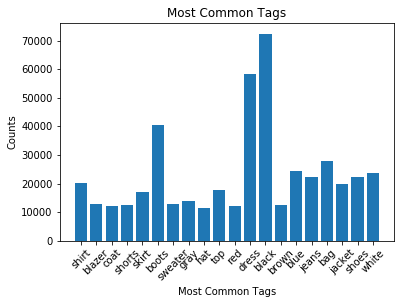

In [11]:
from collections import Counter

tagCounts = dict(Counter(tagWords.split()).most_common(20))
print(tagCounts)
tagUnique, tagCounts = zip(*tagCounts.items())

plt.bar(tagUnique, tagCounts)
plt.xticks(tagUnique, rotation = 45)
plt.xlabel("Most Common Tags")
plt.ylabel("Counts")
plt.title("Most Common Tags")

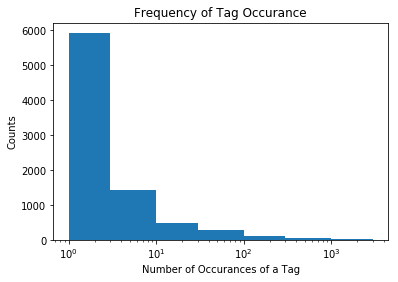

In [12]:
tagCountsTotal = dict(Counter(tagWords.split()))
tagUnique, tagCounts = zip(*tagCountsTotal.items())
#print(tagCountsTotal)
plt.hist(tagCountsTotal.values(), bins = [0,1,3,10,30,100,300,1000,3000])
plt.xscale('log')
plt.xlabel("Number of Occurances of a Tag")
plt.ylabel("Counts")
plt.title("Frequency of Tag Occurance")
plt.show()


In [13]:
frequentTags = []
for key in tagCountsTotal:
    if tagCountsTotal[key] > 100:
        frequentTags.append(key)

#frequentTags.remove('material')
#frequentTags.remove('1490')
frequentTags.remove('top')
frequentTags.remove('lita')
#frequentTags.remove('hm')
#frequentTags.remove('summer')
frequentTags.remove('casual')
frequentTags.remove('litas')
#frequentTags.remove('www.ebaystores.com/bonjourvintage')
frequentTags.remove('diy')
frequentTags.remove('21')

print(len(frequentTags))
print(frequentTags)

258
['crochet', 'tunic', 'green', 'skater', 'cardigan', 'shirt', 'mini', 'distressed', 'print', 'tank', 'neon', 'stripes', 'printed', 'dot', 'ivory', 'white', 'high-waisted', 'magenta', 'accessory', 'glitter', 'ripped', 'block', 'backpack', 'sweater', 'poncho', 'bow', 'h&m', 'waisted', 'chain', 'beaded', 'wrap', 'biker', 'ruffle', 'waist', 'sleeveless', 'sweatshirt', 'mesh', 'jean', 'camel', 'orange', 'knit', 'ring', 'trench', 'nude', 'wash', 'tights', 'oxford', 'silver', 'accessories', 'lace', 'bowler', 'maxi', 'sleeve', 'silk', 'chelsea', 'blend', 'mint', 'bracelet', 'pumps', 'ankle', 'leggings', 'heels', 'suede', 'brown', 'watch', 'tote', 'sleeves', 'cashmere', 'beige', 'bodysuit', 'eye', 'jumper', 'midi', 'jersey', 'flats', 'peach', 'oxfords', 'flower', 'lace-up', 'peplum', 'long', 'feather', 'shoulder', 't-shirt', 'striped', 'gloves', 'chambray', 'collar', 'glasses', 'parka', 'blazer', 'buckle', 'panties', 'gum', 'polyester', 'ruffled', 'cape', 'coat', 'shoes', 'earrings', 'neutra

In [14]:
df = df.fillna(0)
df.drop(['style_0', 'style_1','style_2'], axis=1)
print(df.head())
for index, row in df.iterrows():
    word0 = row['tags_0']
    word1 = row['tags_1']
    word2 = row['tags_2']
    word3 = row['tags_3']
    word4 = row['tags_4']
    word5 = row['tags_5']
    word6 = row['tags_6']
    word7 = row['tags_7']
    word8 = row['tags_8']
    word9 = row['tags_9']
    
    if (str(word0) not in frequentTags):
        df.at[index, 'tags_0'] = None
    if (str(word1) not in frequentTags):
        df.at[index, 'tags_1'] = None
    if (str(word2) not in frequentTags):
        df.at[index, 'tags_2'] = None
    if (str(word3) not in frequentTags):
        df.at[index, 'tags_3'] = None
    if (str(word4) not in frequentTags):
        df.at[index, 'tags_4'] = None
    if (str(word5) not in frequentTags):
        df.at[index, 'tags_5'] = None
    if (str(word6) not in frequentTags):
        df.at[index, 'tags_6'] = None
    if (str(word7) not in frequentTags):
        df.at[index, 'tags_7'] = None
    if (str(word8) not in frequentTags):
        df.at[index, 'tags_8'] = None
    if (str(word9) not in frequentTags):
        df.at[index, 'tags_9'] = None
        


   Unnamed: 0          names    pictures               loc        time  \
0           0  000ecstaSY000   75820.jpg    Surat, Gujarat  2011-07-09   
1           1  000ecstaSY000   75818.jpg    Surat, Gujarat  2012-08-04   
2           2         0011zm  129462.jpg  Ontario, Ontario  2013-04-15   
3           3         0011zm  129468.jpg  Ontario, Ontario  2010-04-22   
4           4         0011zm  129454.jpg  Ontario, Ontario  2014-07-30   

    style_0 style_1 style_2  tags_0    tags_1    tags_2 tags_3 tags_4 tags_5  \
0  romantic    fall       0   puple     boots         0      0      0      0   
1      chic   beach  summer  maroon  bracelet         0      0      0      0   
2     urban  spring       0   boots    jacket  leggings  shirt      0      0   
3   vintage  spring       0     hat       bag         0      0      0      0   
4   leather   other  summer   shirt       bra     pants      0      0      0   

  tags_6 tags_7 tags_8 tags_9  
0      0      0      0      0  
1      0  

In [15]:
tagCounts = [df['tags_0'].count(), df['tags_1'].count(), df['tags_2'].count(), df['tags_3'].count(), df['tags_4'].count(), df['tags_5'].count(), 
             df['tags_6'].count(), df['tags_7'].count(), df['tags_8'].count(), df['tags_9'].count()]
tagCounts

[263075, 223940, 204011, 179834, 139347, 132896, 102042, 72007, 44437, 20658]

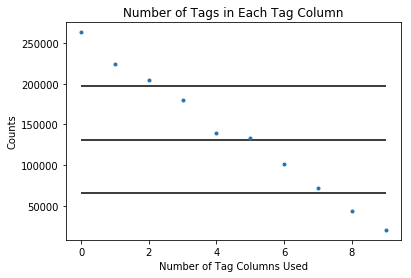

,Unnamed: 0,names,pictures,loc,time,style_0,style_1,style_2,tags_0,tags_1,tags_2,tags_3,tags_4,tags_5,tags_6,tags_7,tags_8,tags_9
0,0,000ecstaSY000,75820.jpg,"Surat, Gujarat",2011-07-09,romantic,fall,0,None,boots,None,None,None,None,None,None,None,None
1,1,000ecstaSY000,75818.jpg,"Surat, Gujarat",2012-08-04,chic,beach,summer,maroon,bracelet,None,None,None,None,None,None,None,None
2,2,0011zm,129462.jpg,"Ontario, Ontario",2013-04-15,urban,spring,0,boots,jacket,leggings,shirt,None,None,None,None,None,None
3,3,0011zm,129468.jpg,"Ontario, Ontario",2010-04-22,vintage,spring,0,hat,bag,None,None,None,None,None,None,None,None
4,4,0011zm,129454.jpg,"Ontario, Ontario",2014-07-30,leather,other,summer,shirt,bra,pants,None,None,None,None,None,None,None


In [16]:
plt.plot(tagCounts, linestyle='', marker='.')
plt.hlines(tagCounts[0]/2, xmin = 0, xmax = 9)
plt.hlines(tagCounts[0]/4, xmin = 0, xmax = 9)
plt.hlines(3*tagCounts[0]/4, xmin = 0, xmax = 9)
plt.xlabel("Number of Tag Columns Used")
plt.ylabel("Counts")
plt.title("Number of Tags in Each Tag Column")
plt.show()

df.head()

In [17]:
#make new dataframe in new shape
#divide into multiple tables ecah with one tag
#add together
#remove ones with tag = None
dfTags0 = df[['names', 'pictures','loc','time','tags_0']]
dfTags1 = df[['names', 'pictures','loc','time','tags_1']]
dfTags2 = df[['names', 'pictures','loc','time','tags_2']]
dfTags3 = df[['names', 'pictures','loc','time','tags_3']]
dfTags4 = df[['names', 'pictures','loc','time','tags_4']]
dfTags5 = df[['names', 'pictures','loc','time','tags_5']]
dfTags6 = df[['names', 'pictures','loc','time','tags_6']]
dfTags7 = df[['names', 'pictures','loc','time','tags_7']]
dfTags8 = df[['names', 'pictures','loc','time','tags_8']]
dfTags9 = df[['names', 'pictures','loc','time','tags_9']]

dfTags0 = dfTags0.rename(columns={'tags_0':'tags'})
dfTags1 = dfTags1.rename(columns={'tags_1':'tags'})
dfTags2 = dfTags2.rename(columns={'tags_2':'tags'})
dfTags3 = dfTags3.rename(columns={'tags_3':'tags'})
dfTags4 = dfTags4.rename(columns={'tags_4':'tags'})
dfTags5 = dfTags5.rename(columns={'tags_5':'tags'})
dfTags6 = dfTags6.rename(columns={'tags_6':'tags'})
dfTags7 = dfTags7.rename(columns={'tags_7':'tags'})
dfTags8 = dfTags8.rename(columns={'tags_8':'tags'})
dfTags9 = dfTags9.rename(columns={'tags_9':'tags'})


dfTags0.head()

,names,pictures,loc,time,tags
0,000ecstaSY000,75820.jpg,"Surat, Gujarat",2011-07-09,None
1,000ecstaSY000,75818.jpg,"Surat, Gujarat",2012-08-04,maroon
2,0011zm,129462.jpg,"Ontario, Ontario",2013-04-15,boots
3,0011zm,129468.jpg,"Ontario, Ontario",2010-04-22,hat
4,0011zm,129454.jpg,"Ontario, Ontario",2014-07-30,shirt


In [18]:
df_shaped = [dfTags0, dfTags1, dfTags2, dfTags3, dfTags4, dfTags5, dfTags6, dfTags7, dfTags8, dfTags9]
df_shaped = pd.concat(df_shaped)
df_shaped.head()

,names,pictures,loc,time,tags
0,000ecstaSY000,75820.jpg,"Surat, Gujarat",2011-07-09,None
1,000ecstaSY000,75818.jpg,"Surat, Gujarat",2012-08-04,maroon
2,0011zm,129462.jpg,"Ontario, Ontario",2013-04-15,boots
3,0011zm,129468.jpg,"Ontario, Ontario",2010-04-22,hat
4,0011zm,129454.jpg,"Ontario, Ontario",2014-07-30,shirt


In [19]:
df_shaped = df_shaped.dropna()
df_shaped.head()

,names,pictures,loc,time,tags
1,000ecstaSY000,75818.jpg,"Surat, Gujarat",2012-08-04,maroon
2,0011zm,129462.jpg,"Ontario, Ontario",2013-04-15,boots
3,0011zm,129468.jpg,"Ontario, Ontario",2010-04-22,hat
4,0011zm,129454.jpg,"Ontario, Ontario",2014-07-30,shirt
5,0011zm,129463.jpg,"Ontario, Ontario",2012-05-29,boots


In [20]:
df_shaped.to_csv('../data/data_training.csv')

In [21]:
df.head()

,Unnamed: 0,names,pictures,loc,time,style_0,style_1,style_2,tags_0,tags_1,tags_2,tags_3,tags_4,tags_5,tags_6,tags_7,tags_8,tags_9
0,0,000ecstaSY000,75820.jpg,"Surat, Gujarat",2011-07-09,romantic,fall,0,None,boots,None,None,None,None,None,None,None,None
1,1,000ecstaSY000,75818.jpg,"Surat, Gujarat",2012-08-04,chic,beach,summer,maroon,bracelet,None,None,None,None,None,None,None,None
2,2,0011zm,129462.jpg,"Ontario, Ontario",2013-04-15,urban,spring,0,boots,jacket,leggings,shirt,None,None,None,None,None,None
3,3,0011zm,129468.jpg,"Ontario, Ontario",2010-04-22,vintage,spring,0,hat,bag,None,None,None,None,None,None,None,None
4,4,0011zm,129454.jpg,"Ontario, Ontario",2014-07-30,leather,other,summer,shirt,bra,pants,None,None,None,None,None,None,None


In [22]:
#create dataframes for each year:
data_2008 = df[(df['time'] < '2009-01-01')]
data_2009 = df[(df['time'] >= '2009-01-01') & (df['time'] < '2010-01-01')]
data_2010 = df[(df['time'] >= '2010-01-01') & (df['time'] < '2011-01-01')]
data_2011 = df[(df['time'] >= '2011-01-01') & (df['time'] < '2012-01-01')]
data_2012 = df[(df['time'] >= '2012-01-01') & (df['time'] < '2013-01-01')]
data_2013 = df[(df['time'] >= '2013-01-01') & (df['time'] < '2014-01-01')]
data_2014 = df[(df['time'] >= '2014-01-01') & (df['time'] < '2015-01-01')]
data_2015 = df[(df['time'] >= '2015-01-01')]

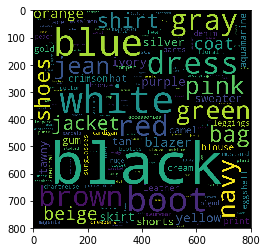

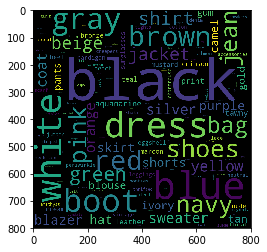

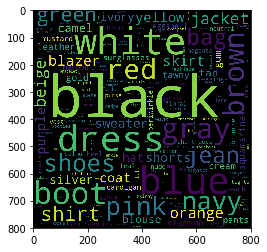

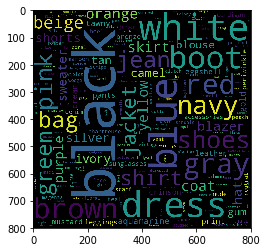

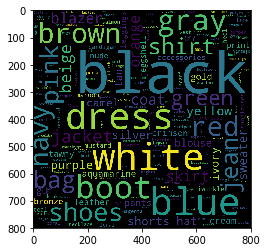

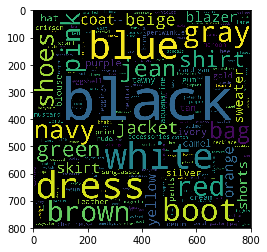

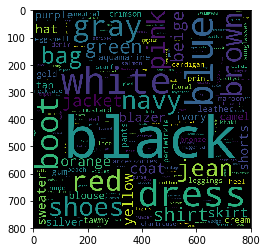

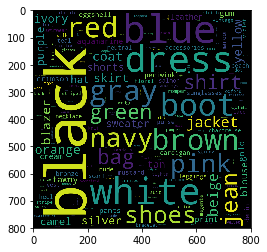

In [23]:
def tagsWordCloud(dataframe):
    tagWords = ' '
    for index, row in dataframe.iterrows():
        word0 = row['tags_0']
        if (word0 != None) and ('nan' not in str(word0)):
            tagWords = tagWords + str(word0) + ' '

    
    wcStyles = WordCloud(width = 800, height = 800, 
                background_color ='black', collocations = False).generate(tagWords)
    plt.imshow(wcStyles)
    plt.show()
    return tagWords


def plotWordFreq(words):
    tagsCounts = dict(Counter(words.split()).most_common(20))
    tagsUnique, tagsCounts = zip(*tagsCounts.items())
    plt.bar(tagsUnique, tagsCounts)
    plt.xticks(tagsUnique, rotation = 45)
    plt.show()
    return tagsUnique, tagsCounts
   
styles2008 = tagsWordCloud(data_2008)    
styles2009 = tagsWordCloud(data_2009)    
styles2010 = tagsWordCloud(data_2010)    
styles2011 = tagsWordCloud(data_2011)    
styles2012 = tagsWordCloud(data_2012)    
styles2013 = tagsWordCloud(data_2013)    
styles2014 = tagsWordCloud(data_2014)    
styles2015 = tagsWordCloud(data_2015)    



In [24]:
def getWordFreq(words):
    Counts = dict(Counter(words.split()).most_common(20))
    Unique, Counts = zip(*Counts.items())
    return Unique, Counts

def getTags(dataframe):
    tagWords = ' '
    for index, row in dataframe.iterrows():
        word0 = row['tags_0']
        if (word0 != None) and ('nan' not in str(word0)):
            tagWords = tagWords + str(word0) + ' '
    return tagWords

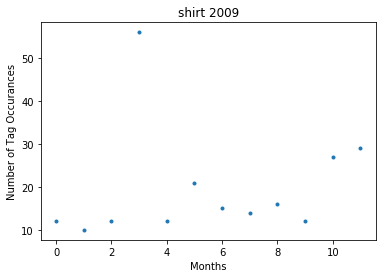

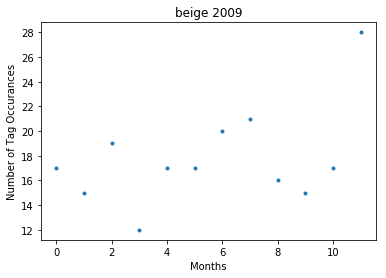

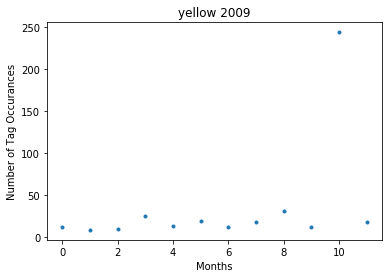

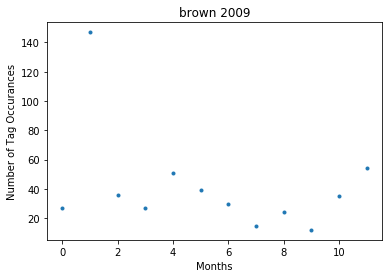

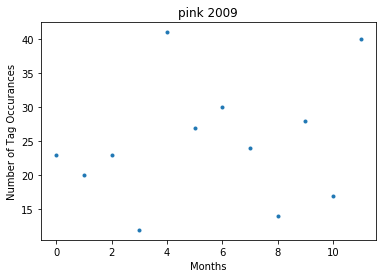

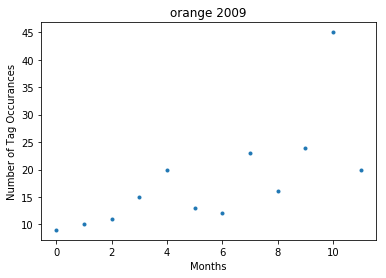

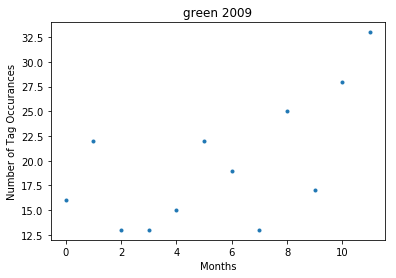

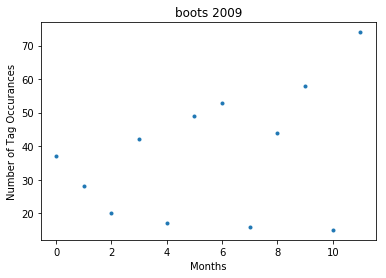

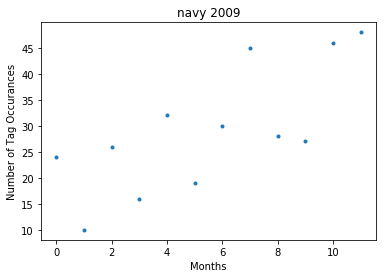

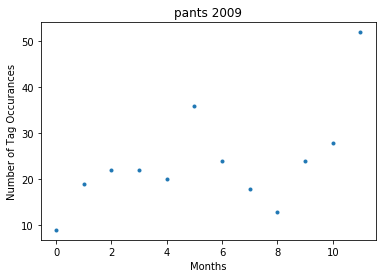

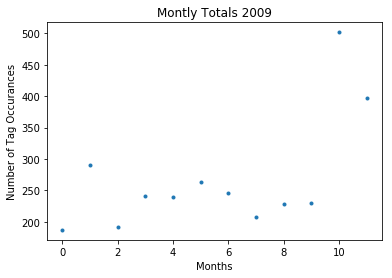

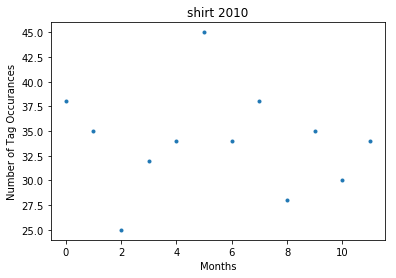

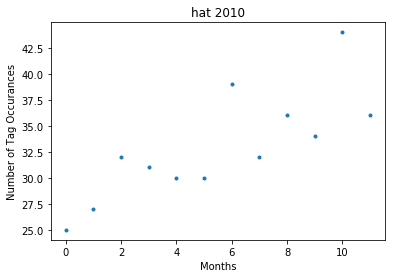

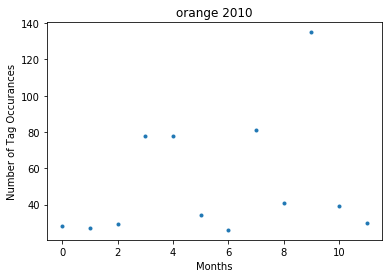

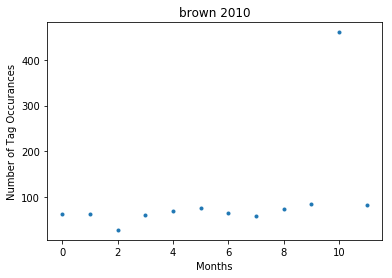

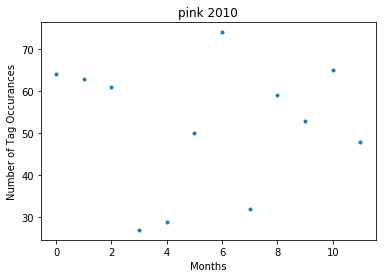

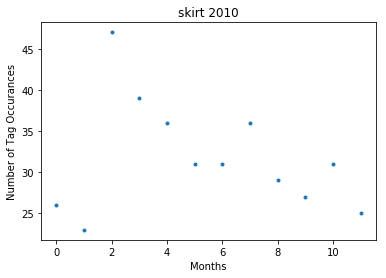

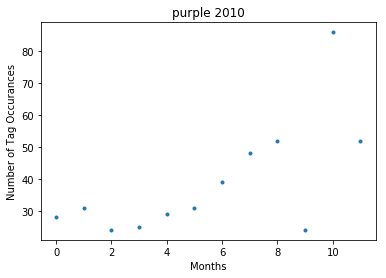

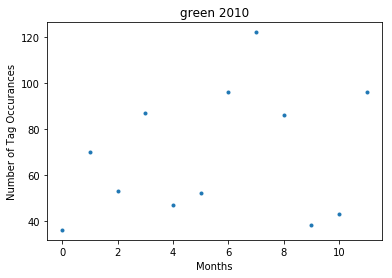

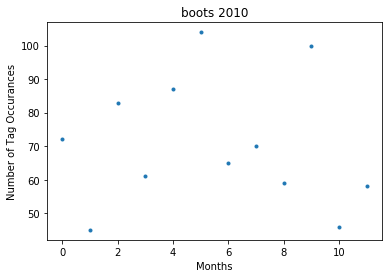

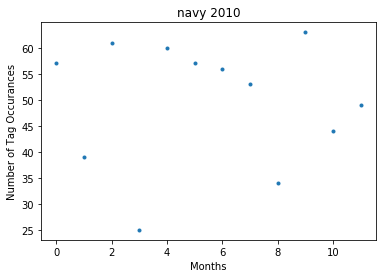

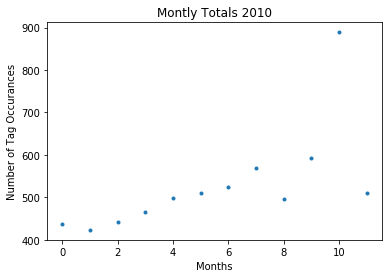

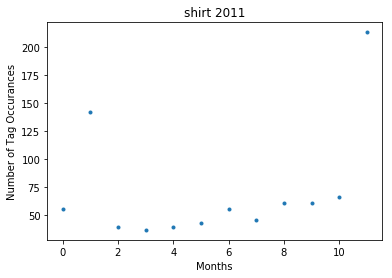

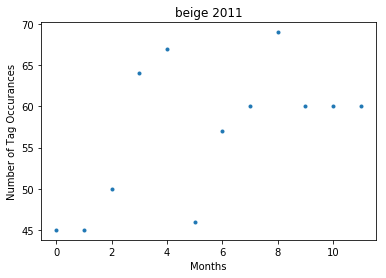

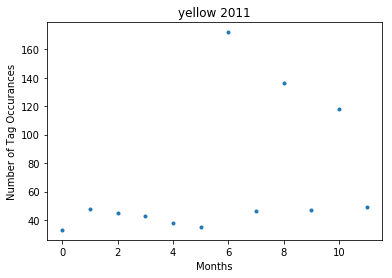

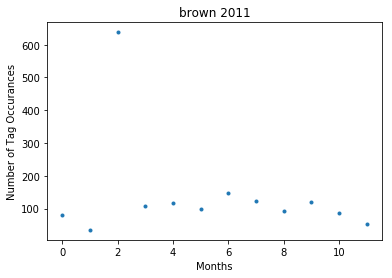

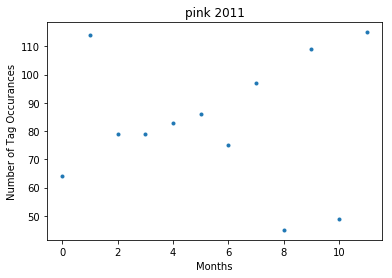

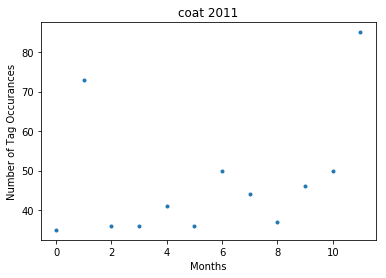

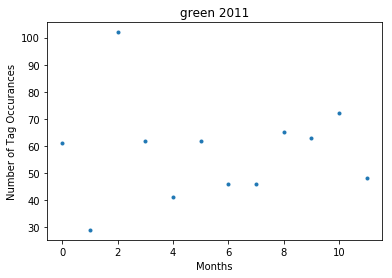

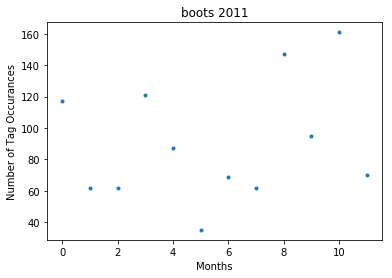

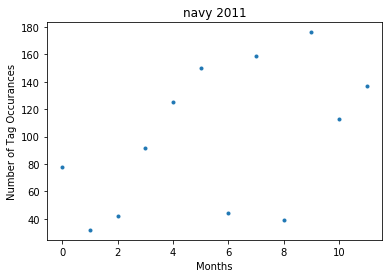

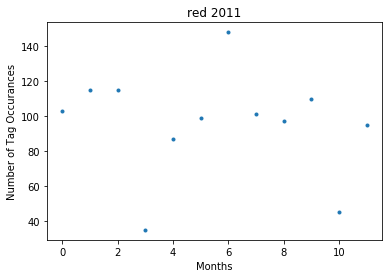

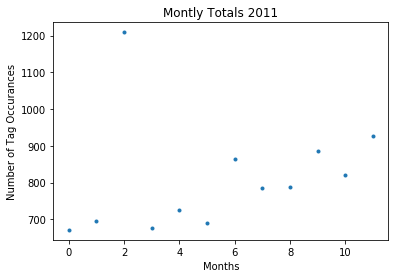

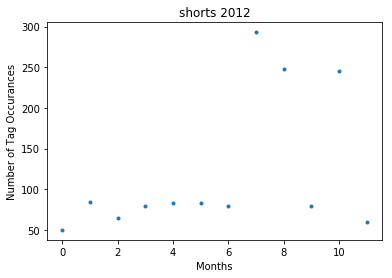

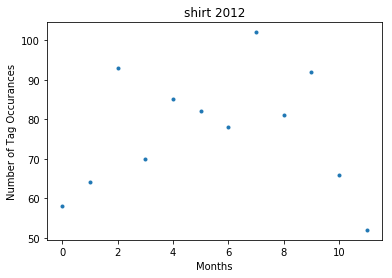

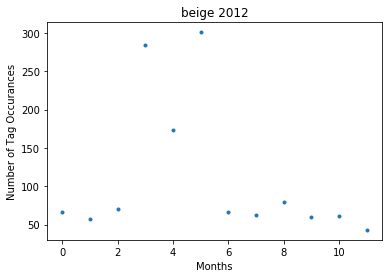

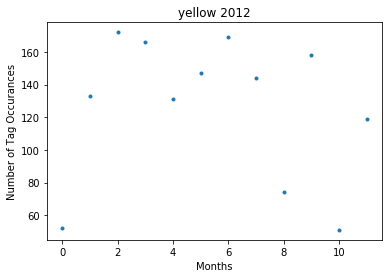

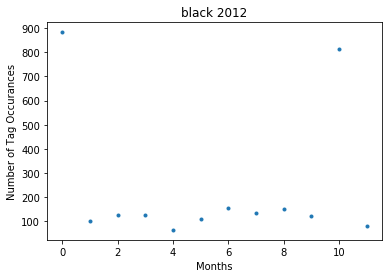

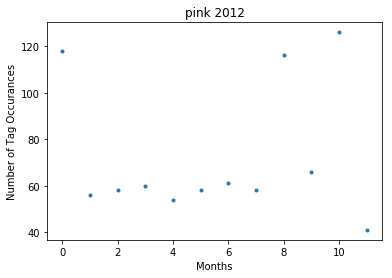

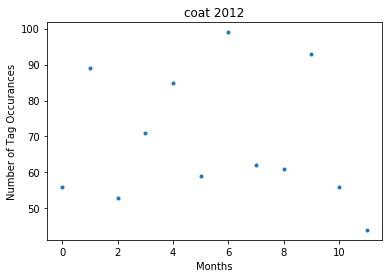

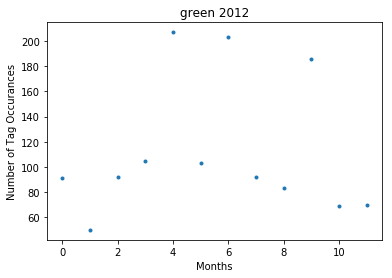

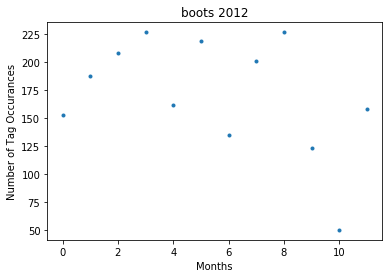

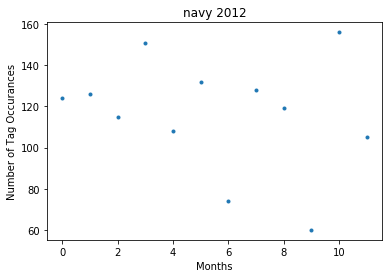

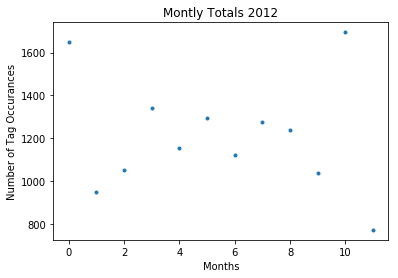

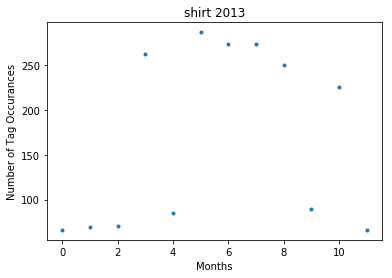

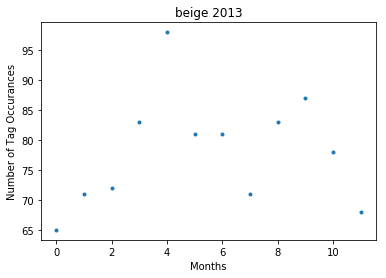

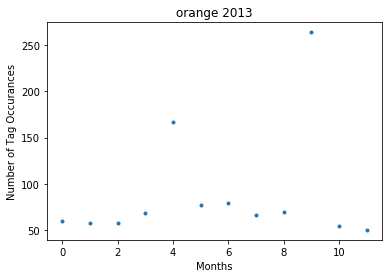

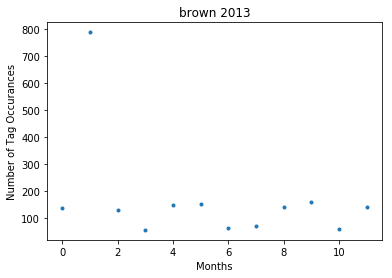

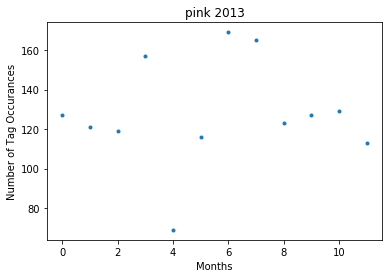

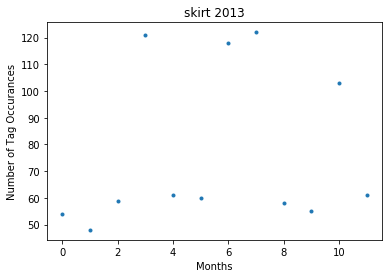

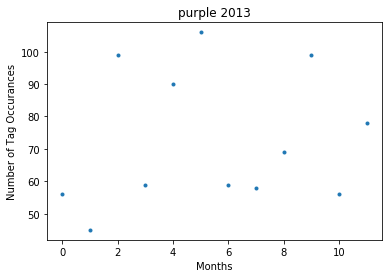

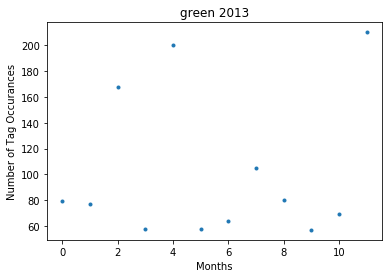

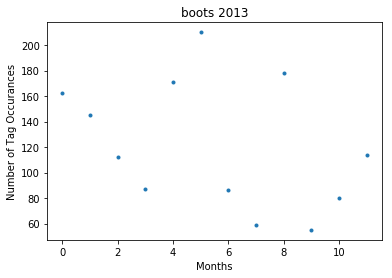

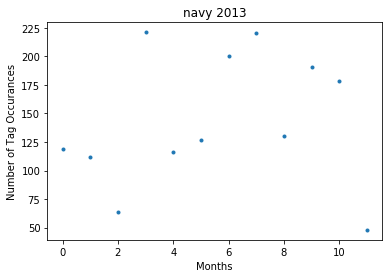

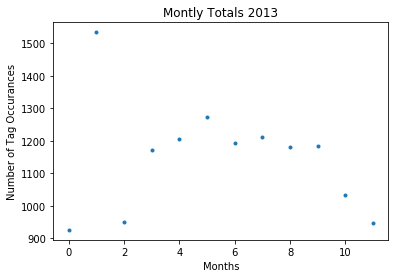

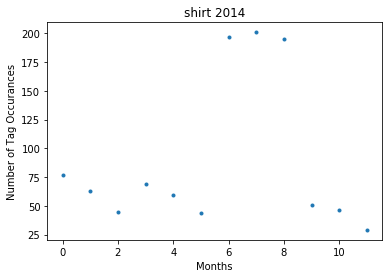

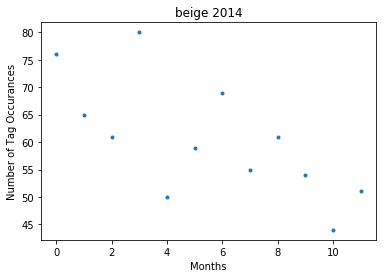

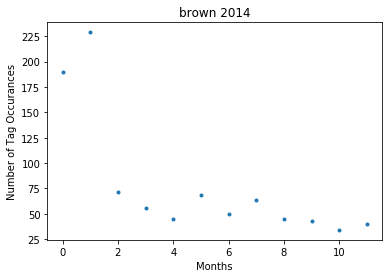

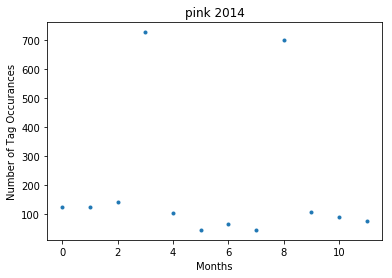

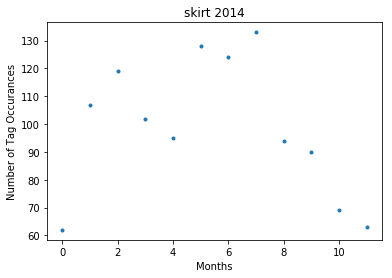

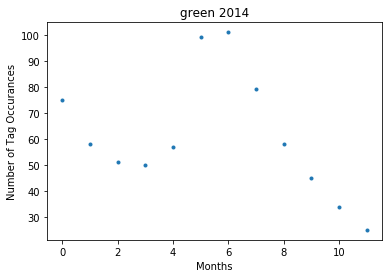

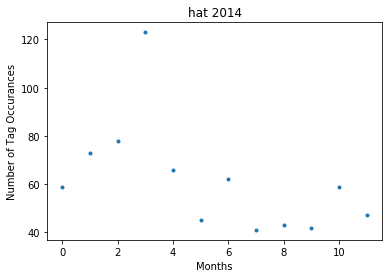

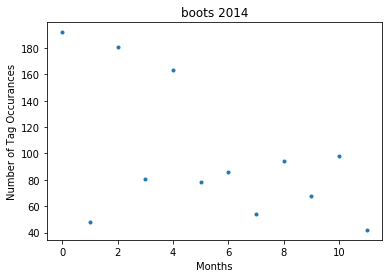

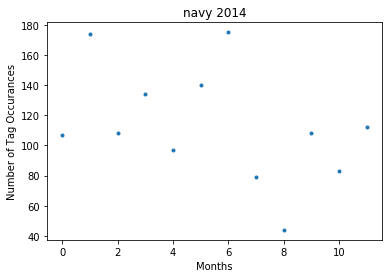

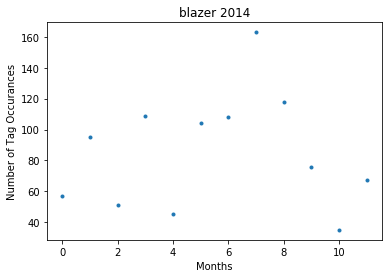

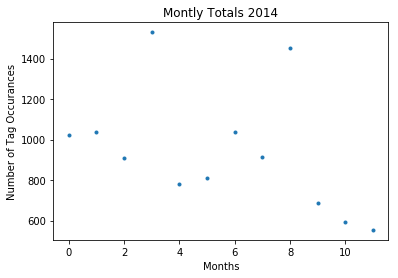

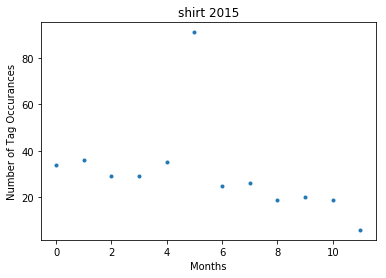

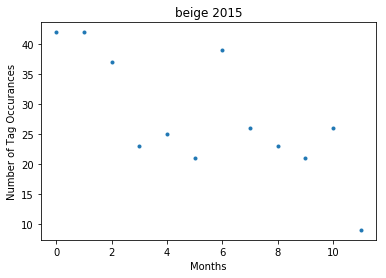

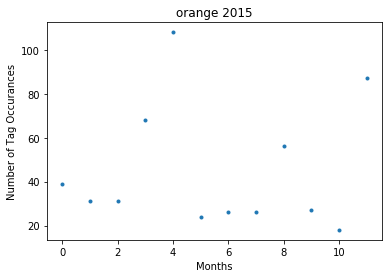

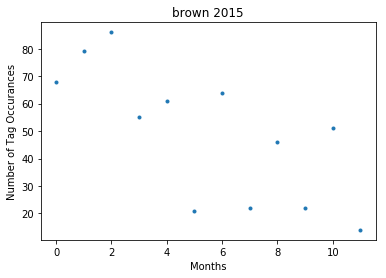

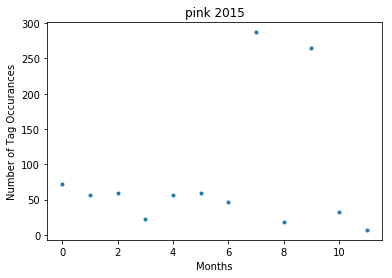

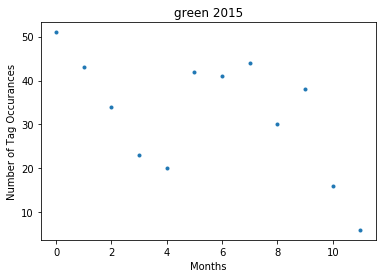

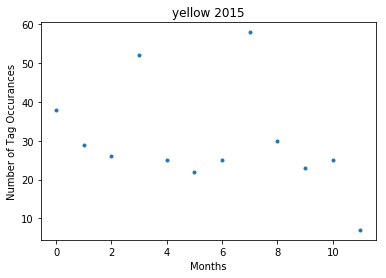

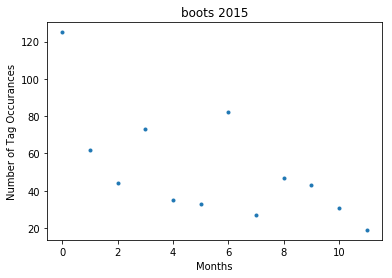

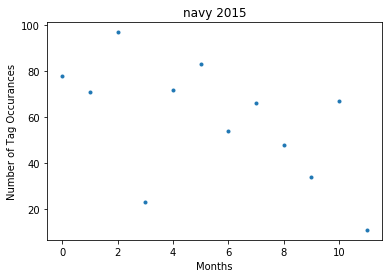

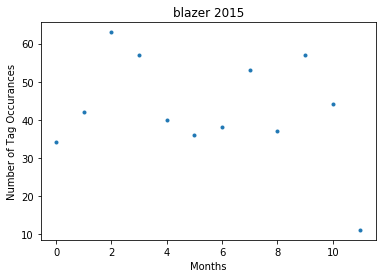

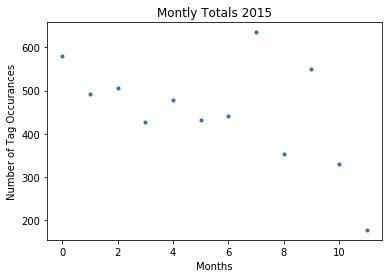

In [25]:
def plotMonths(yeardata, year):
    yeardata['time'] = pd.to_datetime(yeardata['time'])
    months = [g for n, g in yeardata.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months[i] = getTags(months[i])
        
    months_Counts = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Styles = [0,1,2,3,4,5,6,7,8,9,10,11]
    for i in range (0,12):
        months_Styles[i], months_Counts[i] = getWordFreq(months[i])
    
    months_Counts = np.array(months_Counts)
    months_Styles = np.array(months_Styles)
    for i in range(0,10):
        plt.plot(months_Counts[0:12,i], linestyle = '', marker = '.')
        plt.title(months_Styles[0,i] + ' ' + year)
        plt.xlabel("Months")
        plt.ylabel("Number of Tag Occurances")
        plt.show()
    
    monthTotal = []
    for j in range(0,12):
        monthTotal.append(sum(months_Counts[j,0:10]))
    plt.plot(monthTotal, linestyle = '', marker = '.')
    plt.xlabel("Months")
    plt.ylabel("Number of Tag Occurances")
    plt.title('Montly Totals ' + year)
    plt.show()

plotMonths(data_2009, '2009')
plotMonths(data_2010, '2010')
plotMonths(data_2011, '2011')
plotMonths(data_2012, '2012')
plotMonths(data_2013, '2013')
plotMonths(data_2014, '2014')
plotMonths(data_2015, '2015')

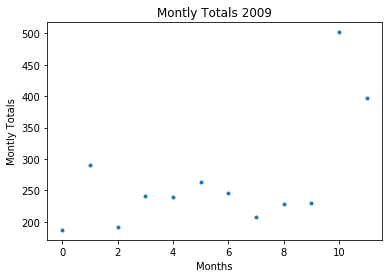

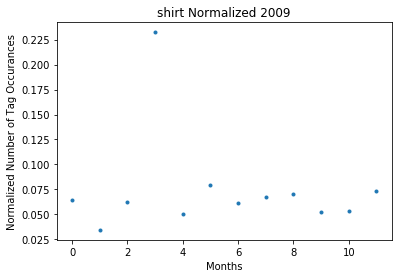

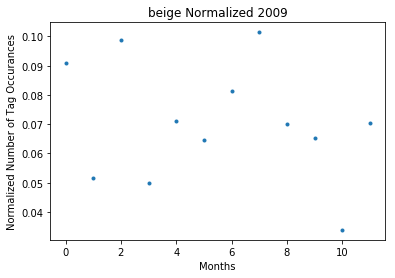

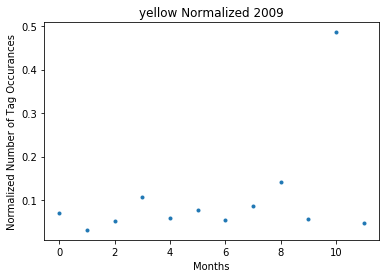

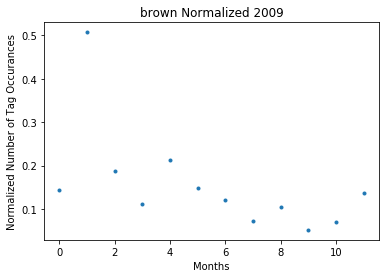

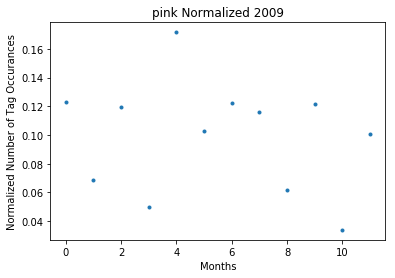

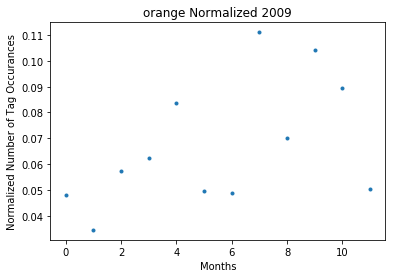

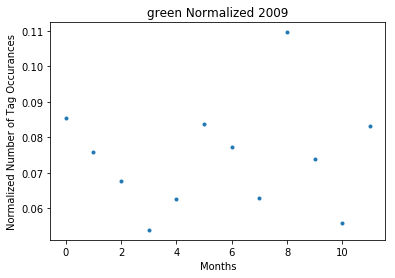

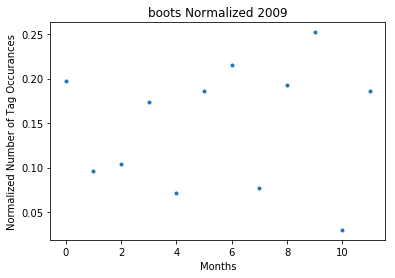

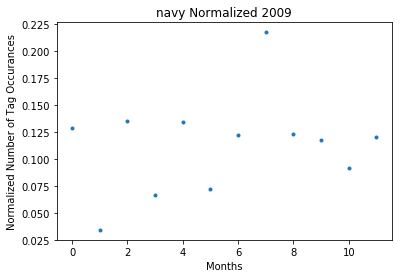

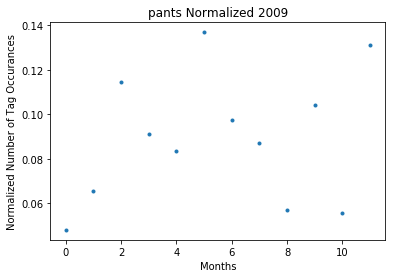

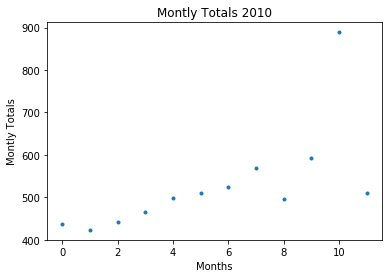

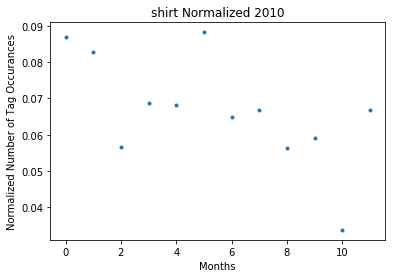

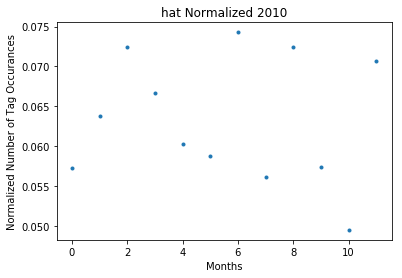

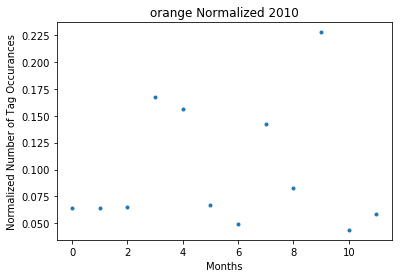

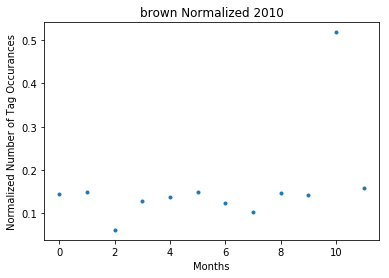

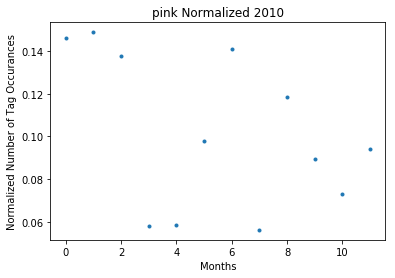

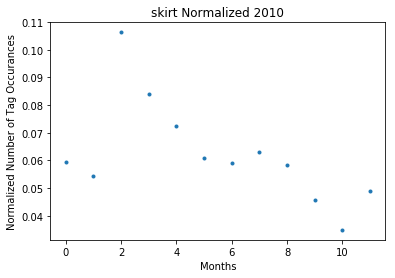

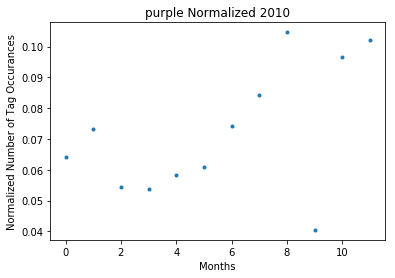

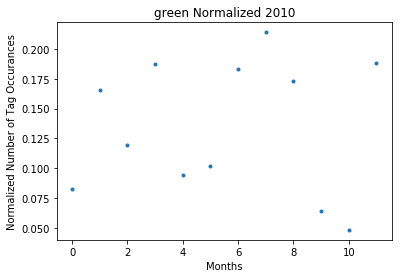

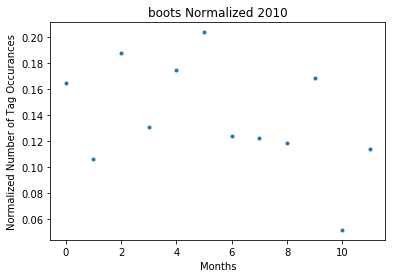

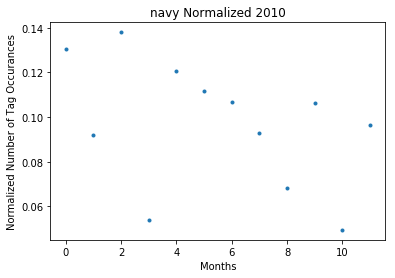

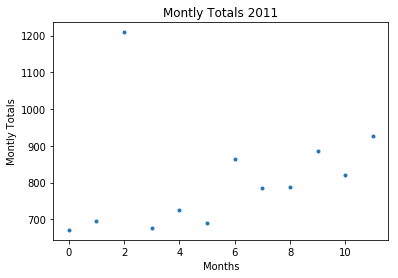

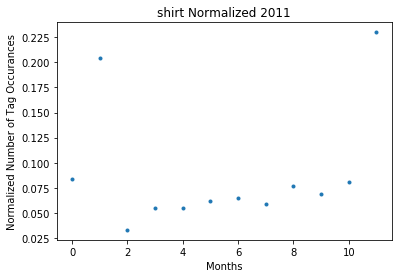

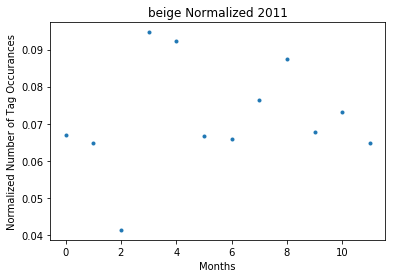

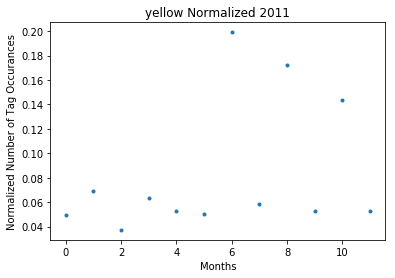

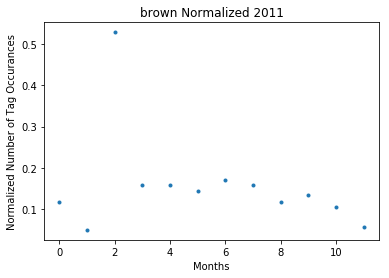

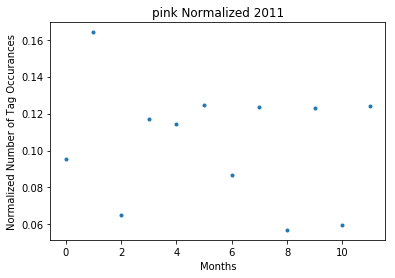

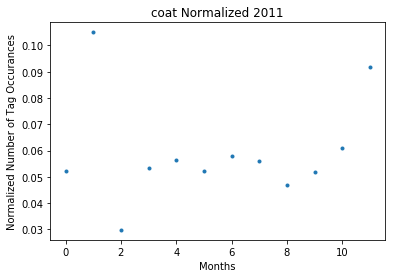

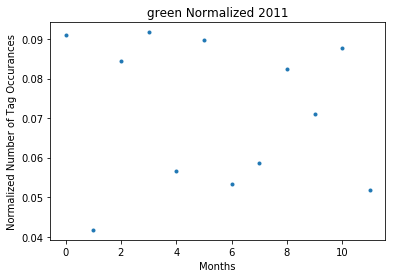

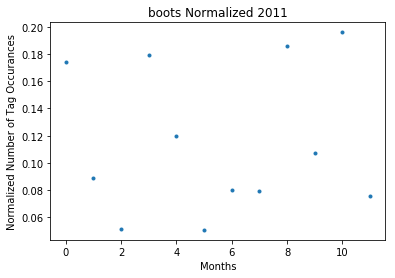

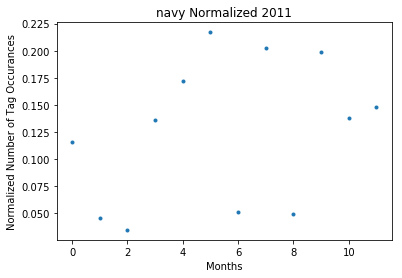

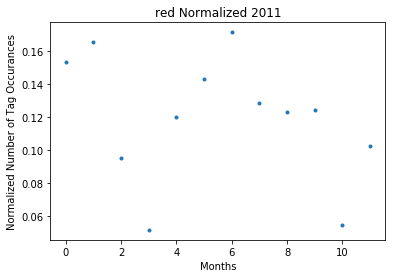

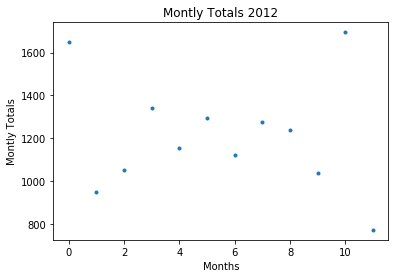

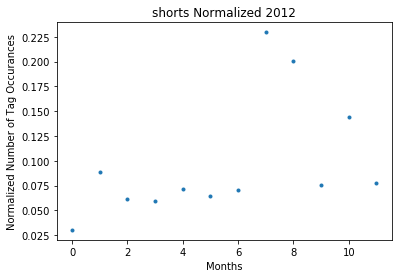

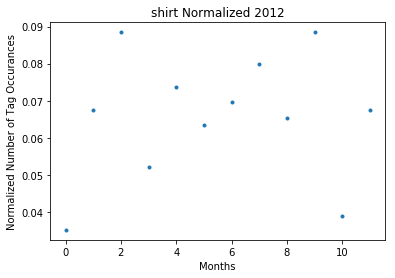

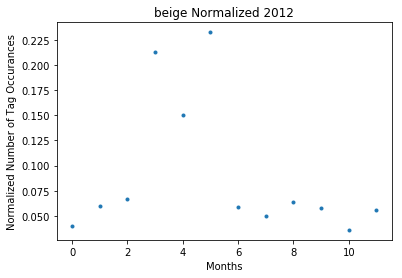

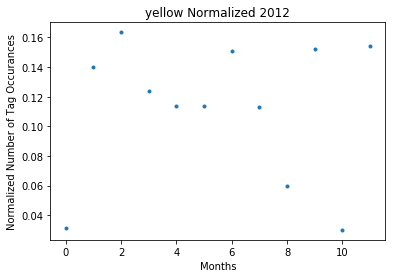

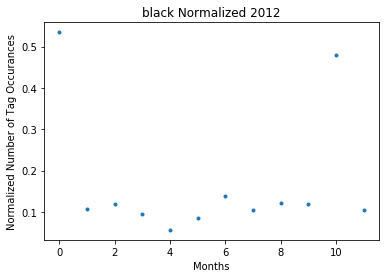

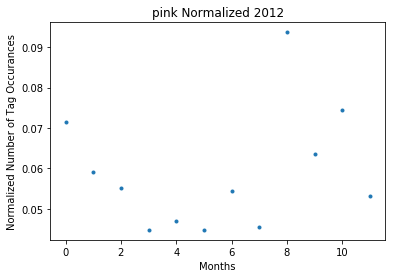

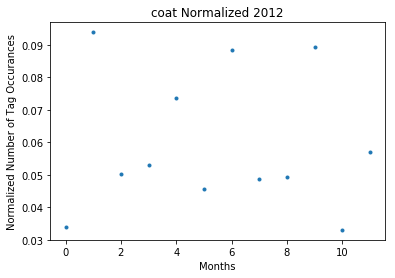

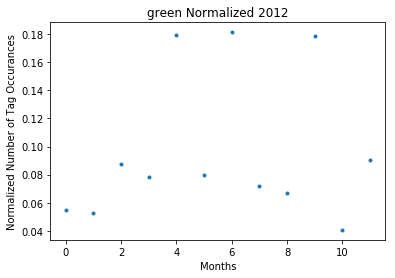

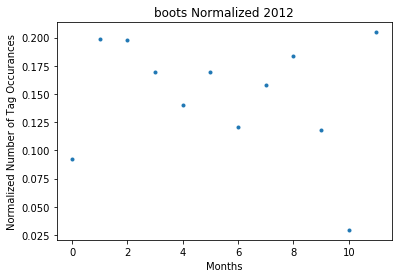

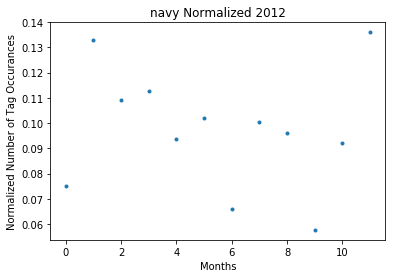

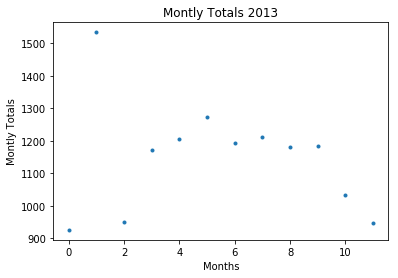

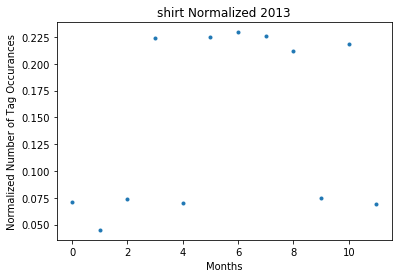

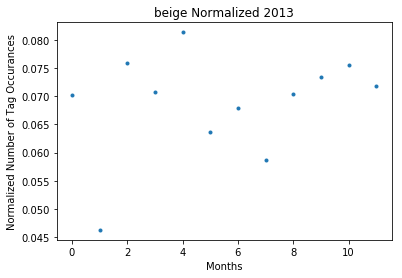

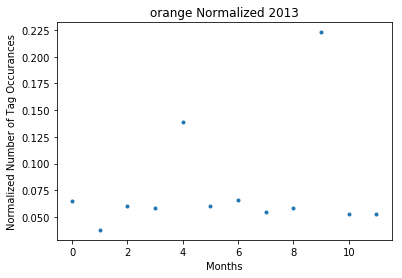

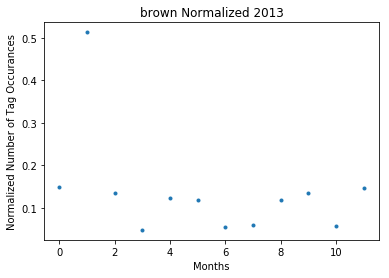

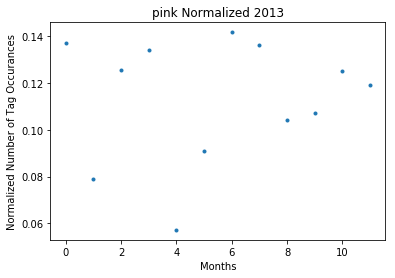

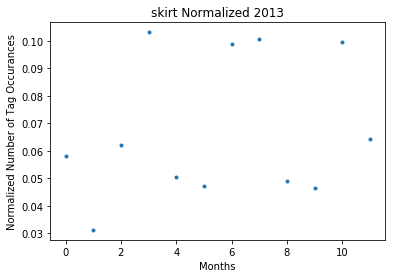

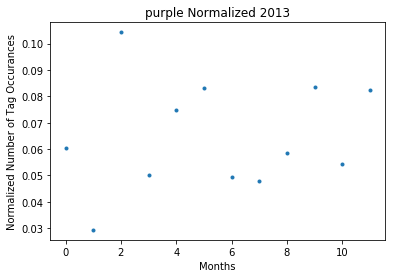

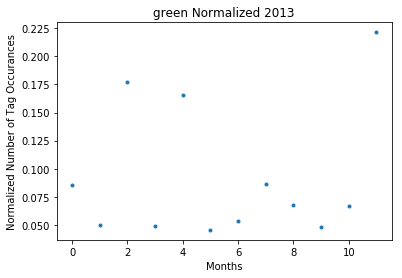

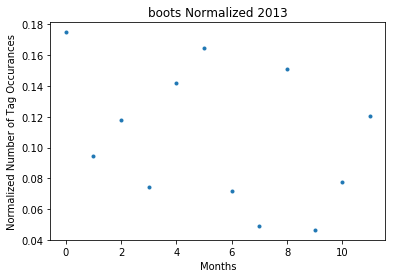

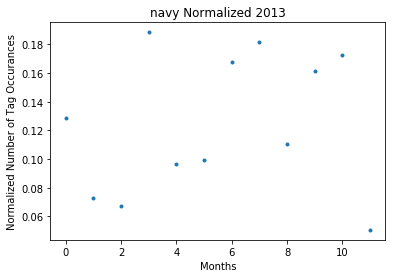

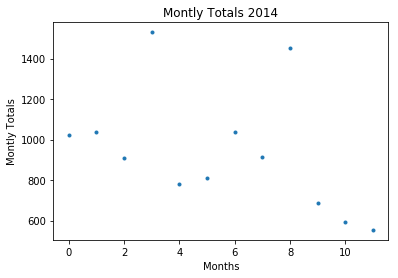

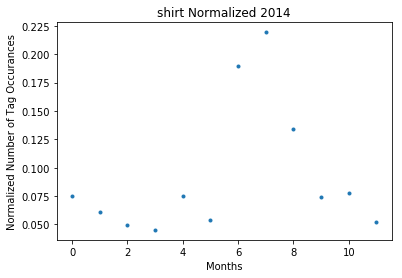

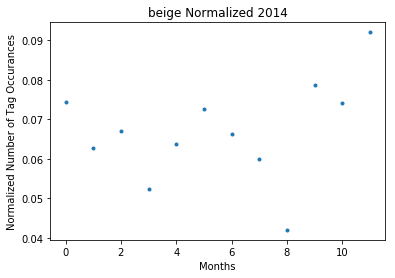

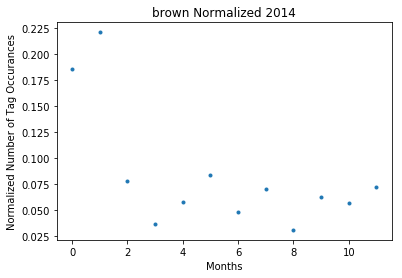

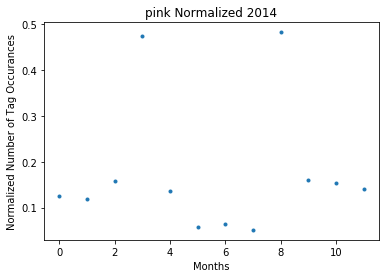

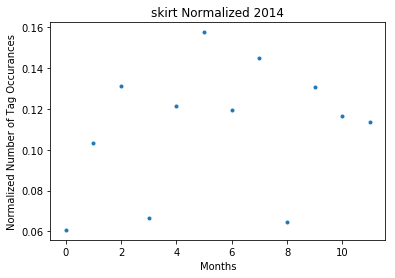

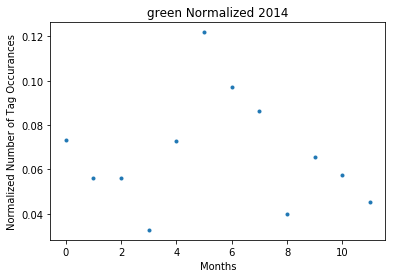

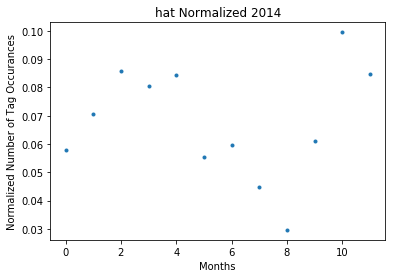

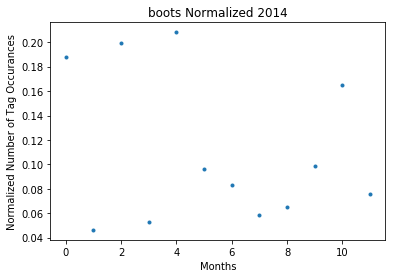

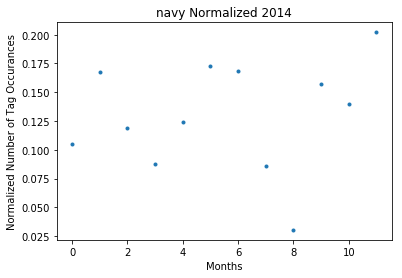

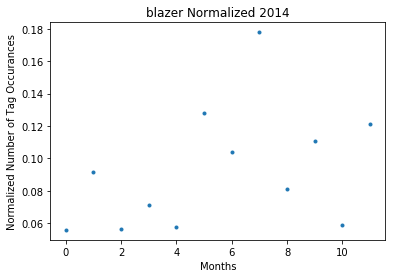

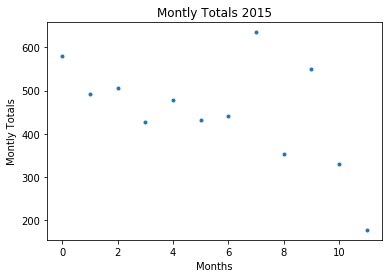

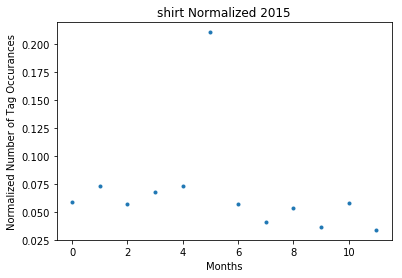

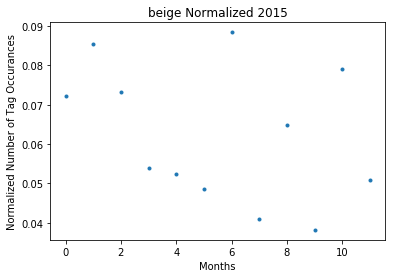

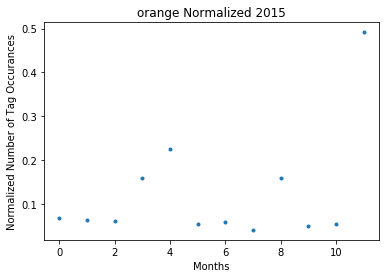

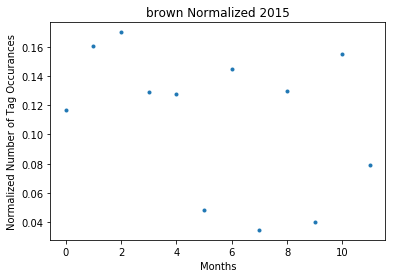

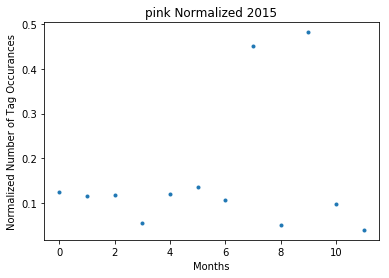

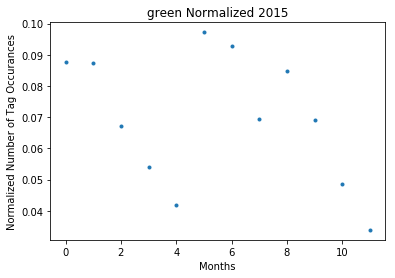

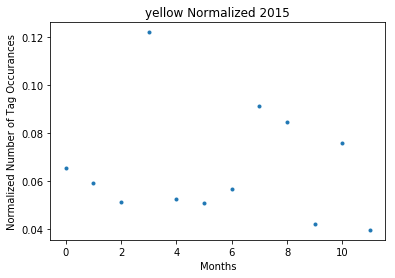

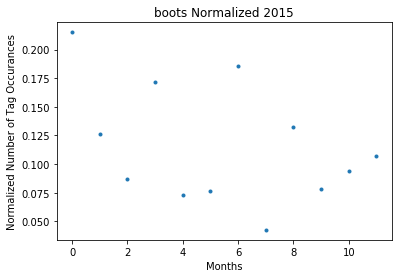

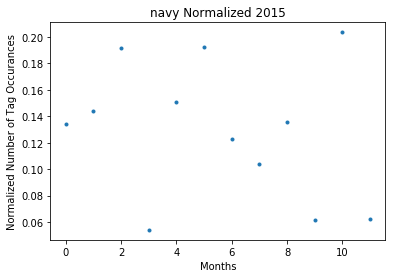

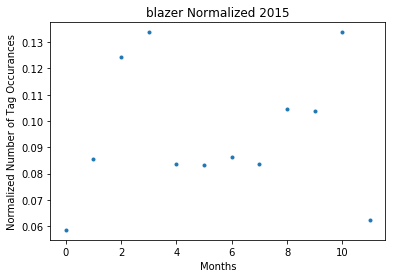

In [26]:
def plotMonthsNorm(yeardata, year):
    yeardata['time'] = pd.to_datetime(yeardata['time'])
    months = [g for n, g in yeardata.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months[i] = getTags(months[i])
        
    months_Counts = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Tags = [0,1,2,3,4,5,6,7,8,9,10,11]
    for i in range (0,12):
        months_Tags[i], months_Counts[i] = getWordFreq(months[i])
    
    months_Counts = np.array(months_Counts).astype(float)
    months_Tags = np.array(months_Tags)
    
    monthTotal = []
    for j in range(0,12):
        monthTotal.append(sum(months_Counts[j,0:10]))
    plt.plot(monthTotal, linestyle = '', marker = '.')
    plt.xlabel("Months")
    plt.ylabel("Montly Totals")
    plt.title('Montly Totals ' + year)
    plt.show()
    
    months_CountsNorm = months_Counts
    
    for i in range(0,12):
        for j in range(0,10):
            months_CountsNorm[i,j] = months_Counts[i,j]/monthTotal[i]
    
    for i in range(0,10):
        plt.plot(months_CountsNorm[0:12,i], linestyle = '', marker = '.')
        plt.title(months_Tags[0,i] + ' Normalized ' + year)
        plt.xlabel("Months")
        plt.ylabel("Normalized Number of Tag Occurances")
        plt.show()
        
plotMonthsNorm(data_2009, '2009')
plotMonthsNorm(data_2010, '2010')
plotMonthsNorm(data_2011, '2011')
plotMonthsNorm(data_2012, '2012')
plotMonthsNorm(data_2013, '2013')
plotMonthsNorm(data_2014, '2014')
plotMonthsNorm(data_2015, '2015')

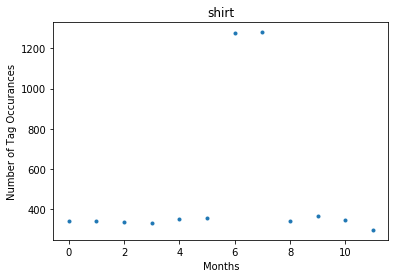

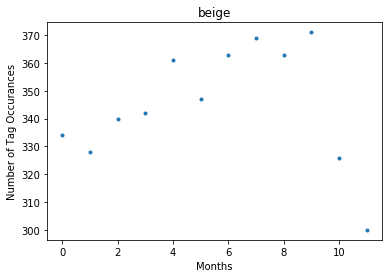

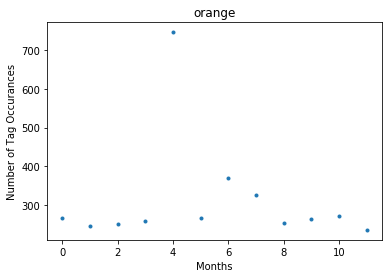

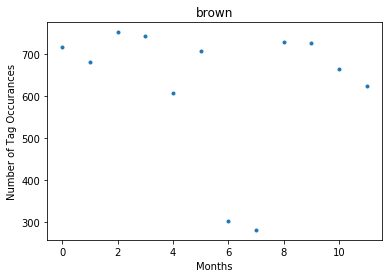

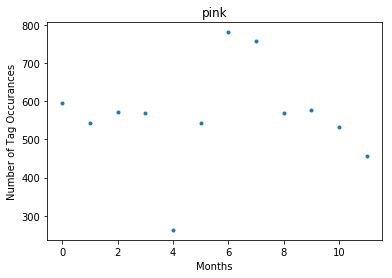

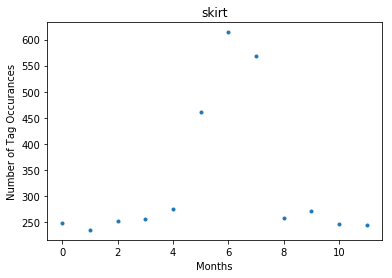

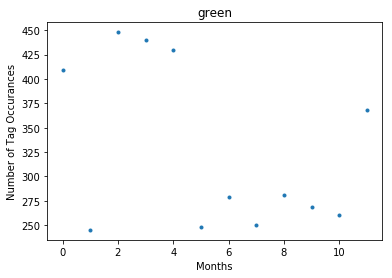

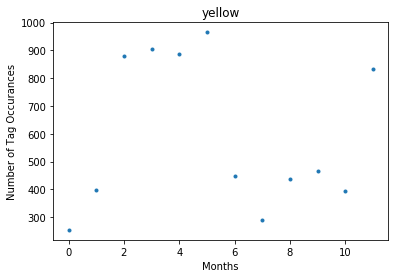

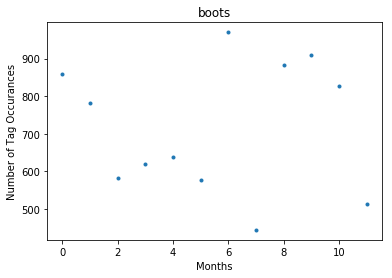

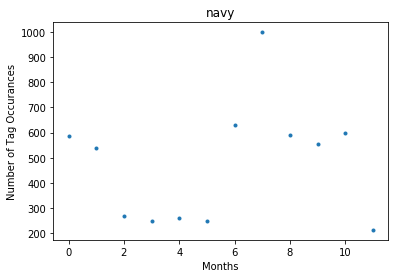

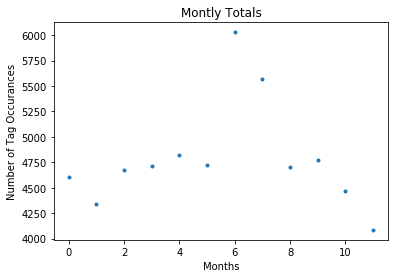

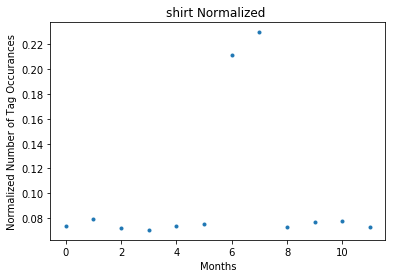

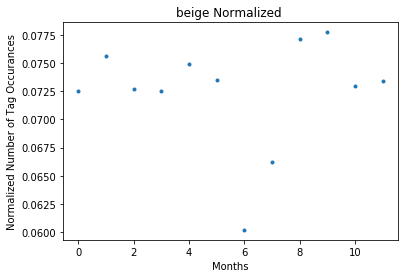

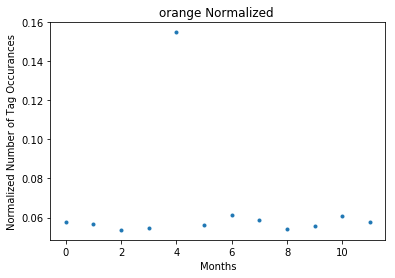

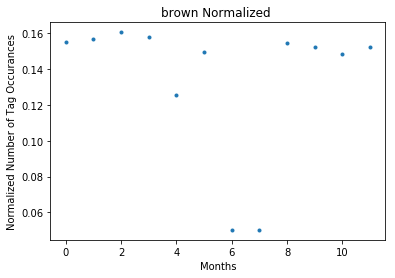

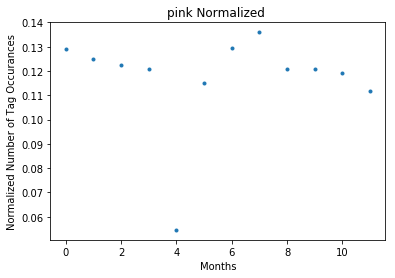

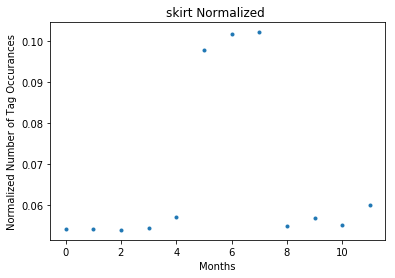

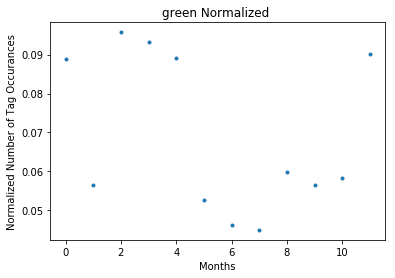

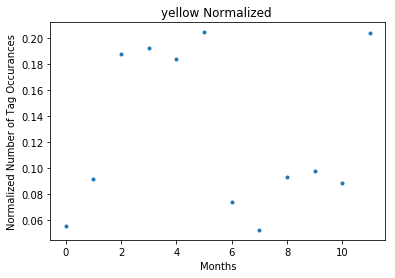

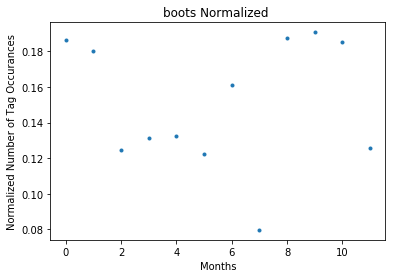

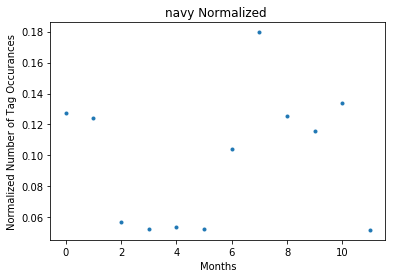

In [27]:
#overall monthly

df['time'] = pd.to_datetime(df['time'])
months = [0,1,2,3,4,5,6,7,8,9,10,11]
months[0] = df[df['time'].dt.month==1]
months[1] = df[df['time'].dt.month==2]
months[2] = df[df['time'].dt.month==3]
months[3] = df[df['time'].dt.month==4]
months[4] = df[df['time'].dt.month==5]
months[5] = df[df['time'].dt.month==6]
months[6] = df[df['time'].dt.month==7]
months[7] = df[df['time'].dt.month==8]
months[8] = df[df['time'].dt.month==9]
months[9] = df[df['time'].dt.month==10]
months[10] = df[df['time'].dt.month==11]
months[11] = df[df['time'].dt.month==12]


for i in range(0,12):
    months[i] = getTags(months[i])
        
months_Counts = [0,1,2,3,4,5,6,7,8,9,10,11]
months_Tags = [0,1,2,3,4,5,6,7,8,9,10,11]
for i in range (0,12):
    months_Tags[i], months_Counts[i] = getWordFreq(months[i])
    
months_Counts = np.array(months_Counts).astype(float)
months_Tags = np.array(months_Tags)

for i in range(0,10):
    plt.plot(months_Counts[0:12,i], linestyle = '', marker = '.')
    plt.xlabel("Months")
    plt.ylabel("Number of Tag Occurances")
    plt.title(months_Tags[0,i])
    plt.show()
    
monthTotal = []
for j in range(0,12):
    monthTotal.append(sum(months_Counts[j,0:10]))
plt.plot(monthTotal, linestyle = '', marker = '.')
plt.title('Montly Totals')
plt.xlabel("Months")
plt.ylabel("Number of Tag Occurances")
plt.show()

months_CountsNorm = months_Counts
for i in range(0,12):
    for j in range(0,10):
        months_CountsNorm[i,j] = months_Counts[i,j]/monthTotal[i]
    
for i in range(0,10):
    plt.plot(months_CountsNorm[0:12,i], linestyle = '', marker = '.')
    plt.title(months_Tags[0,i] + ' Normalized ')
    plt.xlabel("Months")
    plt.ylabel("Normalized Number of Tag Occurances")
    plt.show()
    

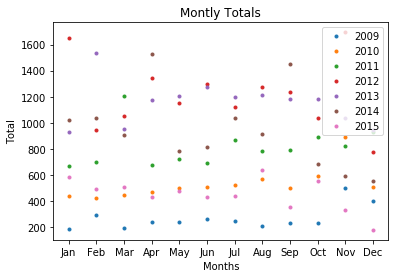

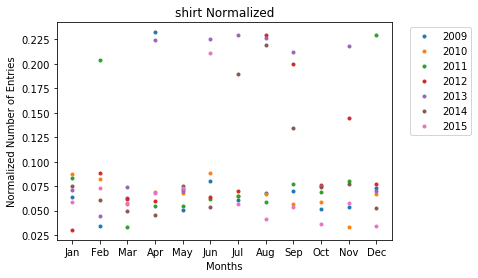

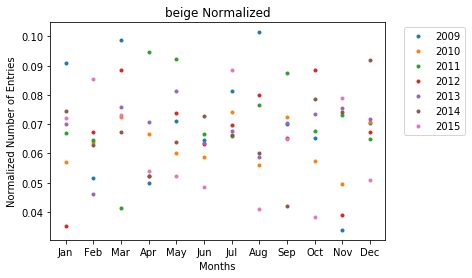

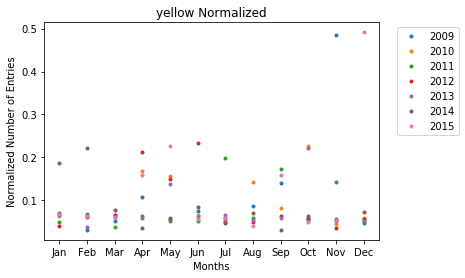

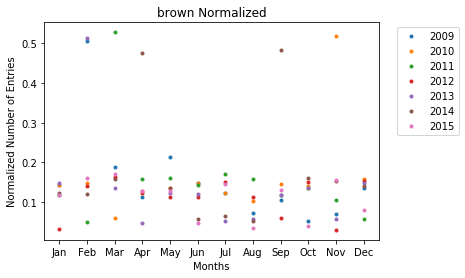

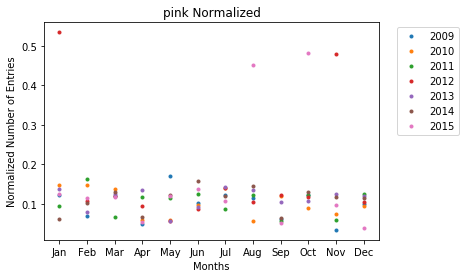

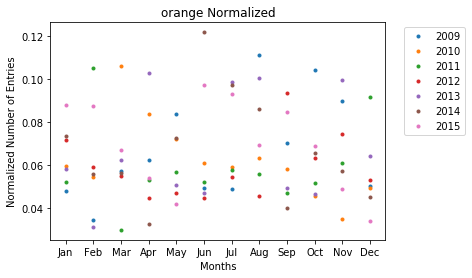

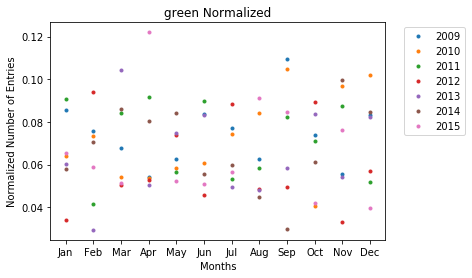

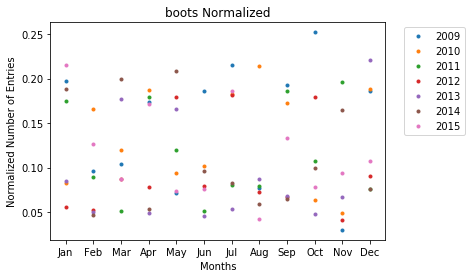

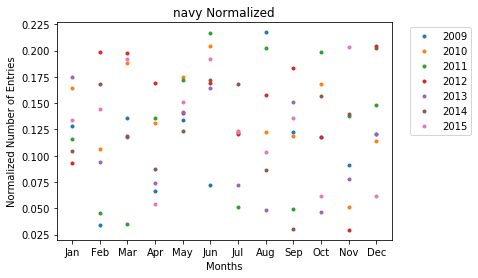

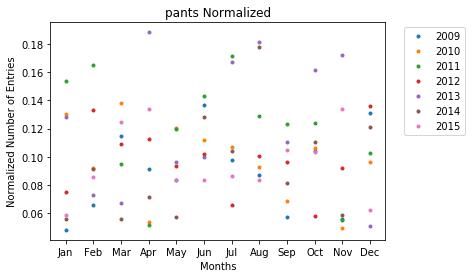

In [28]:
def plotTrends(dataframe):
    
    dataframe['time'] = pd.to_datetime(dataframe['time'])

    data_2008 = dataframe[(dataframe['time'] < '2009-01-01')]
    data_2009 = dataframe[(dataframe['time'] >= '2009-01-01') & (dataframe['time'] < '2010-01-01')]
    data_2010 = dataframe[(dataframe['time'] >= '2010-01-01') & (dataframe['time'] < '2011-01-01')]
    data_2011 = dataframe[(dataframe['time'] >= '2011-01-01') & (dataframe['time'] < '2012-01-01')]
    data_2012 = dataframe[(dataframe['time'] >= '2012-01-01') & (dataframe['time'] < '2013-01-01')]
    data_2013 = dataframe[(dataframe['time'] >= '2013-01-01') & (dataframe['time'] < '2014-01-01')]
    data_2014 = dataframe[(dataframe['time'] >= '2014-01-01') & (dataframe['time'] < '2015-01-01')]
    data_2015 = dataframe[(dataframe['time'] >= '2015-01-01')]
    
    months2009 = [g for n, g in data_2009.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2009[i] = getTags(months2009[i])
    months2010 = [g for n, g in data_2010.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2010[i] = getTags(months2010[i])
    months2011 = [g for n, g in data_2011.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2011[i] = getTags(months2011[i])
    months2012 = [g for n, g in data_2012.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2012[i] = getTags(months2012[i])
    months2013 = [g for n, g in data_2013.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2013[i] = getTags(months2013[i])
    months2014 = [g for n, g in data_2014.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2014[i] = getTags(months2014[i])
    months2015 = [g for n, g in data_2015.groupby(pd.Grouper(key='time',freq='M'))]
    for i in range(0,12):
        months2015[i] = getTags(months2015[i])
        
    months_Counts2009 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Tags2009 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2010 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Tags2010 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2011 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Tags2011 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2012 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Tags2012 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2013 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Tags2013 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2014 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Tags2014 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Counts2015 = [0,1,2,3,4,5,6,7,8,9,10,11]
    months_Tags2015 = [0,1,2,3,4,5,6,7,8,9,10,11]

    
    for i in range (0,12):
        months_Tags2009[i], months_Counts2009[i] = getWordFreq(months2009[i])
        months_Tags2010[i], months_Counts2010[i] = getWordFreq(months2010[i])
        months_Tags2011[i], months_Counts2011[i] = getWordFreq(months2011[i])
        months_Tags2012[i], months_Counts2012[i] = getWordFreq(months2012[i])
        months_Tags2013[i], months_Counts2013[i] = getWordFreq(months2013[i])
        months_Tags2014[i], months_Counts2014[i] = getWordFreq(months2014[i])
        months_Tags2015[i], months_Counts2015[i] = getWordFreq(months2015[i])
       
    months_Counts2009 = np.array(months_Counts2009).astype(float)
    months_Tags2009 = np.array(months_Tags2009)
    months_Counts2010 = np.array(months_Counts2010).astype(float)
    months_Tags2010 = np.array(months_Tags2010)
    months_Counts2011 = np.array(months_Counts2011).astype(float)
    months_Tags2011 = np.array(months_Tags2011)
    months_Counts2012 = np.array(months_Counts2012).astype(float)
    months_Tags2012 = np.array(months_Tags2012)
    months_Counts2013 = np.array(months_Counts2013).astype(float)
    months_Tags2013 = np.array(months_Tags2013)
    months_Counts2014 = np.array(months_Counts2014).astype(float)
    months_Tags2014 = np.array(months_Tags2014)
    months_Counts2015 = np.array(months_Counts2015).astype(float)
    months_Tags2015 = np.array(months_Tags2015)
    
    monthTotal2009 = []
    monthTotal2010 = []
    monthTotal2011 = []
    monthTotal2012 = []
    monthTotal2013 = []
    monthTotal2014 = []
    monthTotal2015 = []

    
    cmap = plt.get_cmap('tab10')
    for j in range(0,12):
        monthTotal2009.append(sum(months_Counts2009[j,0:10]))
        monthTotal2010.append(sum(months_Counts2010[j,0:10]))
        monthTotal2011.append(sum(months_Counts2011[j,0:10]))
        monthTotal2012.append(sum(months_Counts2012[j,0:10]))
        monthTotal2013.append(sum(months_Counts2013[j,0:10]))
        monthTotal2014.append(sum(months_Counts2014[j,0:10]))
        monthTotal2015.append(sum(months_Counts2015[j,0:10]))

        
    plt.plot(monthTotal2009, linestyle = '', marker = '.', label = '2009')
    plt.plot(monthTotal2010, linestyle = '', marker = '.', label = '2010')
    plt.plot(monthTotal2011, linestyle = '', marker = '.', label = '2011')
    plt.plot(monthTotal2012, linestyle = '', marker = '.', label = '2012')
    plt.plot(monthTotal2013, linestyle = '', marker = '.', label = '2013')
    plt.plot(monthTotal2014, linestyle = '', marker = '.', label = '2014')
    plt.plot(monthTotal2015, linestyle = '', marker = '.', label = '2015')

    plt.title('Montly Totals')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel('Months')
    plt.ylabel('Total')
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.legend()
    plt.show()
    
    months_CountsNorm2009 = months_Counts2009
    months_CountsNorm2010 = months_Counts2010
    months_CountsNorm2011 = months_Counts2011
    months_CountsNorm2012 = months_Counts2012
    months_CountsNorm2013 = months_Counts2013
    months_CountsNorm2014 = months_Counts2014
    months_CountsNorm2015 = months_Counts2015


    for i in range(0,12):
        for j in range(0,10):
            months_CountsNorm2009[i,j] = months_Counts2009[i,j]/monthTotal2009[i]
            months_CountsNorm2010[i,j] = months_Counts2010[i,j]/monthTotal2010[i]
            months_CountsNorm2011[i,j] = months_Counts2011[i,j]/monthTotal2011[i]
            months_CountsNorm2012[i,j] = months_Counts2012[i,j]/monthTotal2012[i]
            months_CountsNorm2013[i,j] = months_Counts2013[i,j]/monthTotal2013[i]
            months_CountsNorm2014[i,j] = months_Counts2014[i,j]/monthTotal2014[i]
            months_CountsNorm2015[i,j] = months_Counts2015[i,j]/monthTotal2015[i]

    
    for i in range(0,10):
        plt.plot(months_CountsNorm2009[0:12,i], linestyle = '', marker = '.', label = '2009', c = cmap(0))
        plt.plot(months_CountsNorm2010[0:12,i], linestyle = '', marker = '.', label = '2010', c = cmap(1))
        plt.plot(months_CountsNorm2011[0:12,i], linestyle = '', marker = '.', label = '2011', c = cmap(2))
        plt.plot(months_CountsNorm2012[0:12,i], linestyle = '', marker = '.', label = '2012', c = cmap(3))
        plt.plot(months_CountsNorm2013[0:12,i], linestyle = '', marker = '.', label = '2013', c = cmap(4))
        plt.plot(months_CountsNorm2014[0:12,i], linestyle = '', marker = '.', label = '2014', c = cmap(5))
        plt.plot(months_CountsNorm2015[0:12,i], linestyle = '', marker = '.', label = '2015', c = cmap(6))
        plt.title(months_Tags2009[0,i] + ' Normalized')
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        plt.xlabel('Months')
        plt.ylabel('Normalized Number of Entries')
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
        plt.show()
    
    


plotTrends(df)
